# Problem Statement

Understanding the problem statement is the first and foremost step. This helps us give an intuition of what we will face ahead. Let us see the problem statement: 

You are a cab rental start-up company. You have successfully run the pilot project and now want to launch your cab service across the country. You have collected the historical data from your pilot project and now have a requirement to apply analytics for fare prediction. You need to design a system that predicts the fare amount for a cab ride in the city.

## Data Dictionary

**Features**

**Independent Features:**

|Feature|Feature Type|Description|
|-----|-----|-----|
|pickup_datetime|Timestamp|Date and Time of the commencement of the ride|
|pickup_longitude|Numerical|Longitude of the pickup location|
|pickup_latitude|Numerical|Latitude of the pickup location|
|dropoff_longitude|Numerical|Longitude of the dropoff location|
|dropoff_latitude|Numerical|Latitude of the dropoff location|
|passenger_count|Numerical|Number of passengers in the cab ride|

**Dependent Feature:**

|Feature|Feature Type|Description|
|-----|-----|-----|
|fare_amount|Numerical|Total Fare Amount of a ride|

In [1]:
#Let's import the required libraries
import os
import pandas as pd                                                                       # For working with Dataframes
import numpy as np                                                                        # For mathematical calculations
import matplotlib.pyplot as plt                                                           # For Data Visualization
%matplotlib inline 
import seaborn as sns                                                                     # For Data Visualization
sns.set()
from sklearn.preprocessing import MinMaxScaler                                            # For scaling the features
from statsmodels.formula.api import ols                                                   # For Linear Regression implementation
import statsmodels.api as sm                                                              # For Linear Regression implementation
from sklearn.model_selection import train_test_split                                      # For Train Test Split
from sklearn.metrics import mean_squared_error                                            # For calculating the RMSE
from sklearn.ensemble import RandomForestRegressor                                        # For Random Forest implementation
from sklearn.tree import DecisionTreeRegressor                                            # For Decision Tree implementation

In [2]:
#Setting the working directory
os.chdir("C:/Users/user/Desktop/edWisor/Project/Cab Rental Startup/Data")

In [3]:
#Loading the Data
data_train = pd.read_csv("train_cab - Copy.csv",na_values={'fare_amount':'430-'})
data_test = pd.read_csv("test - Copy.csv")

In [4]:
data_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [5]:
data_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [6]:
data_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [7]:
data_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16042.000000,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,15.015004,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,430.460945,10.578384,6.826587,10.575062,6.187087,60.844122
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,8.500000,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,12.500000,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [8]:
data_train.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        16042 non-null  float64
 1   pickup_datetime    16067 non-null  object 
 2   pickup_longitude   16067 non-null  float64
 3   pickup_latitude    16067 non-null  float64
 4   dropoff_longitude  16067 non-null  float64
 5   dropoff_latitude   16067 non-null  float64
 6   passenger_count    16012 non-null  float64
dtypes: float64(6), object(1)
memory usage: 878.8+ KB


In [10]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_datetime    9914 non-null   object 
 1   pickup_longitude   9914 non-null   float64
 2   pickup_latitude    9914 non-null   float64
 3   dropoff_longitude  9914 non-null   float64
 4   dropoff_latitude   9914 non-null   float64
 5   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


- Since, the pickup_datetime feature in both training and testing datasets is of type Object, we will convert it to a timestamp type.

In [11]:
data = [data_train, data_test]
for i in data:
    i['pickup_datetime']  = pd.to_datetime(i['pickup_datetime'],errors='coerce')

In [12]:
df_train = data_train.copy()
df_test = data_test.copy()

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   fare_amount        16042 non-null  float64            
 1   pickup_datetime    16066 non-null  datetime64[ns, UTC]
 2   pickup_longitude   16067 non-null  float64            
 3   pickup_latitude    16067 non-null  float64            
 4   dropoff_longitude  16067 non-null  float64            
 5   dropoff_latitude   16067 non-null  float64            
 6   passenger_count    16012 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 878.8 KB


In [14]:
df_train.shape

(16067, 7)

- There are some missing values in fare amount and passenger_count features in training dataset. We will deal with them later.

In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 1   pickup_longitude   9914 non-null   float64            
 2   pickup_latitude    9914 non-null   float64            
 3   dropoff_longitude  9914 non-null   float64            
 4   dropoff_latitude   9914 non-null   float64            
 5   passenger_count    9914 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(1)
memory usage: 464.8 KB


In [16]:
df_test.shape

(9914, 6)

- No missing values in the testing dataset.

## Univariate Analysis

In this section we will analyse each feature one by one.

Let's analyze the dependent feature fare_amount first.

- fare_amount:

In [17]:
df_train['fare_amount'].describe

<bound method NDFrame.describe of 0         4.5
1        16.9
2         5.7
3         7.7
4         5.3
         ... 
16062     6.5
16063    16.1
16064     8.5
16065     8.1
16066     8.5
Name: fare_amount, Length: 16067, dtype: float64>

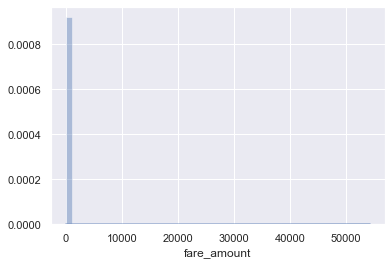

In [18]:
sns.distplot(df_train['fare_amount'])
plt.show()

- Highly skewed towards right.
- Negative and 0 values.

The negative and 0 values need to be removed since they do not make sense.

In [19]:
df_train[df_train['fare_amount']<1]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2039,-2.90,2010-03-09 23:37:10+00:00,-73.789450,40.643498,-73.788665,40.641952,1.0
2486,-2.50,2015-03-22 05:14:27+00:00,-74.000031,40.720631,-73.999809,40.720539,1.0
2780,0.01,2015-05-01 15:38:41+00:00,-73.939041,40.713963,-73.941673,40.713997,1.0
10002,0.00,2010-02-15 14:26:01+00:00,-73.987115,40.738808,-74.005911,40.713960,1.0
13032,-3.00,2013-08-30 08:57:10+00:00,-73.995062,40.740755,-73.995885,40.741357,4.0


In [20]:
df_train.shape

(16067, 7)

In [21]:
df_train = df_train.drop(df_train[df_train['fare_amount']<1].index, axis=0)

In [22]:
df_train.shape

(16062, 7)

Let's analyse the independent features.

Our knowledge of latitudes and longitudes tells us that the latitudes range from -90 to +90 and the longitudes range from -180 to +180. So any values which are not in this ranges will be removed.

- pickup_longitude:

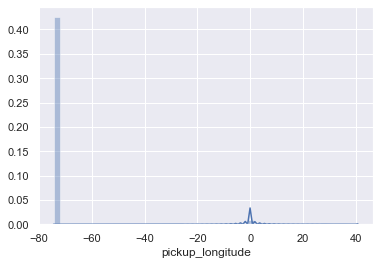

In [23]:
sns.distplot(df_train['pickup_longitude'])
plt.show()

- Values are in the acceptable range.
- There are some values near 0.

- pickup_latitude:

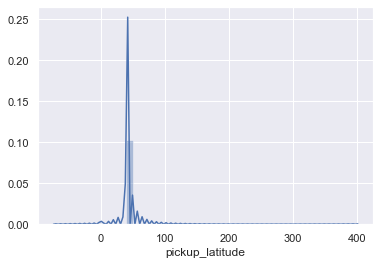

In [24]:
sns.distplot(df_train['pickup_latitude'])
plt.show()

- There are values which are not in the acceptable range.
- There are values near 0.

- dropoff_longitude:

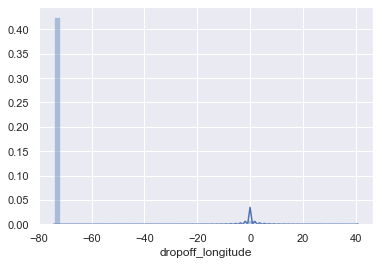

In [25]:
sns.distplot(df_train['dropoff_longitude'])
plt.show()

- Values are in the acceptable range.
- There are some values near 0.

- dropoff_latitude:

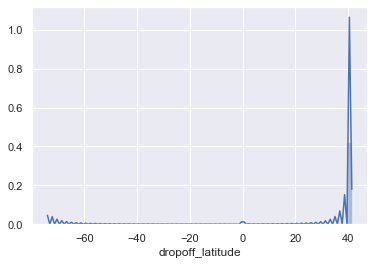

In [26]:
sns.distplot(df_train['dropoff_latitude'])
plt.show()

- Values are in the acceptable range.
- There are some values near 0.

Values near the (0,0) coordinates do not make sense so we will remove them along with the values which are not in the acceptable ranges for latitudes and longitudes.

In [27]:
print('pickup_longitude values which are above 180 = {}'.format(sum(df_train['pickup_longitude']>180)))
print('pickup_longitude values which are below -180 = {}'.format(sum(df_train['pickup_longitude']<-180)))
print('pickup_latitude values which are above 90 = {}'.format(sum(df_train['pickup_latitude']>90)))
print('pickup_latitude values which are below -90 = {}'.format(sum(df_train['pickup_latitude']<-90)))
print('dropoff_longitude values which are above 180 = {}'.format(sum(df_train['dropoff_longitude']>180)))
print('dropoff_longitude values which are below -180 = {}'.format(sum(df_train['dropoff_longitude']<-180)))
print('dropoff_latitude values which are below -90 = {}'.format(sum(df_train['dropoff_latitude']<-90)))
print('dropoff_latitude values which are above 90 = {}'.format(sum(df_train['dropoff_latitude']>90)))

pickup_longitude values which are above 180 = 0
pickup_longitude values which are below -180 = 0
pickup_latitude values which are above 90 = 1
pickup_latitude values which are below -90 = 0
dropoff_longitude values which are above 180 = 0
dropoff_longitude values which are below -180 = 0
dropoff_latitude values which are below -90 = 0
dropoff_latitude values which are above 90 = 0


In [28]:
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    print(i,'values which are equal to 0 = {}'.format(sum(df_train[i]==0)))

pickup_longitude values which are equal to 0 = 315
pickup_latitude values which are equal to 0 = 315
dropoff_longitude values which are equal to 0 = 314
dropoff_latitude values which are equal to 0 = 312


In [29]:
df_train.shape

(16062, 7)

In [30]:
#For values outside the acceptable ranges.
df_train = df_train.drop(df_train[df_train['pickup_latitude']>90].index, axis=0)

#For values at (0,0) coordinates.
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    df_train = df_train.drop(df_train[df_train[i]==0].index, axis=0)

In [31]:
df_train.shape

(15735, 7)

- passenger_count:

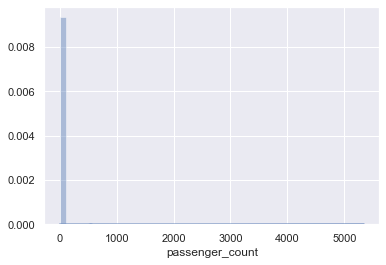

In [32]:
sns.distplot(df_train['passenger_count'])
plt.show()

In [33]:
df_train['passenger_count'].unique()

array([1.000e+00, 2.000e+00, 3.000e+00,       nan, 6.000e+00, 5.000e+00,
       4.000e+00, 4.560e+02, 5.334e+03, 0.000e+00, 5.350e+02, 3.540e+02,
       5.500e+01, 5.540e+02, 5.300e+01, 3.500e+01, 3.450e+02, 5.345e+03,
       5.360e+02, 4.300e+01, 5.800e+01, 5.370e+02, 8.700e+01, 5.312e+02,
       1.300e+00, 1.200e-01, 5.570e+02])

A cab can't accomodate more than 6 passengers at one time. Also, a cab shouldn't have less than 1 passenger.
So, let's find the values which do not satisfy these two conditions and remove them.

In [34]:
for i in range(4,11):
    print('passenger_count above ' +str(i)+' = {}'.format(sum(df_train['passenger_count']>i)))

passenger_count above 4 = 1339
passenger_count above 5 = 314
passenger_count above 6 = 18
passenger_count above 7 = 18
passenger_count above 8 = 18
passenger_count above 9 = 18
passenger_count above 10 = 18


In [35]:
len(df_train[df_train['passenger_count']>6])

18

In [36]:
df_train[df_train['passenger_count']<1]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
314,34.0,2015-06-02 23:16:15+00:00,-73.974899,40.751095,-73.908546,40.881878,0.00
566,4.9,2012-01-28 21:33:18+00:00,-73.955322,40.782840,-73.955797,40.773673,0.00
678,6.5,2012-02-27 07:24:20+00:00,-73.983397,40.738183,-73.971395,40.758023,0.00
1160,13.3,2011-05-25 23:58:48+00:00,-73.998360,40.740348,-73.946455,40.777348,0.00
1935,10.1,2011-10-23 11:09:28+00:00,-73.971400,40.795000,-73.967900,40.768600,0.00
2200,8.1,2011-05-23 16:54:19+00:00,-73.988008,40.748303,-74.005185,40.738733,0.00
2425,8.9,2011-11-25 22:47:33+00:00,-73.999900,40.738600,-73.971800,40.746300,0.00
3034,5.7,2011-03-06 12:03:14+00:00,-73.986557,40.745783,-73.994545,40.729995,0.00
3413,7.3,2011-02-28 06:39:16+00:00,-73.973413,40.743708,-73.985220,40.741583,0.00
3481,11.3,2011-11-30 17:23:02+00:00,-73.968100,40.762500,-73.984400,40.760900,0.00


In [37]:
len(df_train[df_train['passenger_count']<1])

56

In [38]:
df_train.shape

(15735, 7)

In [39]:
df_train = df_train.drop(df_train[df_train['passenger_count']>6].index, axis=0)
df_train = df_train.drop(df_train[df_train['passenger_count']<1].index, axis=0)

In [40]:
df_train.shape

(15661, 7)

## Missing Value Analysis

In [41]:
#Creating a dataframe of missing values per feature.
missing_val = pd.DataFrame(df_train.isnull().sum())

missing_val

,0
fare_amount,22
pickup_datetime,1
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,55


- Missing values in fare_amount, pickup_datetime and passenger_count features.

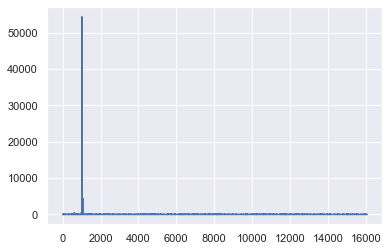

In [42]:
df_train['fare_amount'].plot()

There are outliers in fare_amount so we will impute the missing values with its median.

In [43]:
df_train['fare_amount'].mean()

15.117676961442399

In [44]:
df_train['fare_amount'].median()

8.5

In [45]:
df_train['fare_amount'].fillna(8.5, inplace = True)

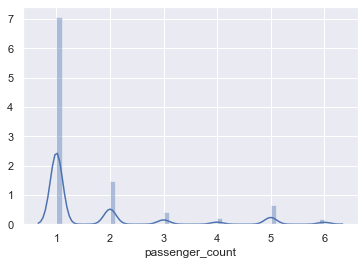

In [46]:
sns.distplot(df_train['passenger_count'])
plt.show()

- Since, the most frequent value of passenger_count is 1, we will impute the missing values with 1.

In [47]:
df_train['passenger_count'].describe

<bound method NDFrame.describe of 0        1.0
1        1.0
2        2.0
3        1.0
4        1.0
        ... 
16062    1.0
16063    2.0
16064    1.0
16065    1.0
16066    NaN
Name: passenger_count, Length: 15661, dtype: float64>

In [48]:
df_train['passenger_count'].fillna(1.0, inplace = True)

In [49]:
df_train['passenger_count'].describe

<bound method NDFrame.describe of 0        1.0
1        1.0
2        2.0
3        1.0
4        1.0
        ... 
16062    1.0
16063    2.0
16064    1.0
16065    1.0
16066    1.0
Name: passenger_count, Length: 15661, dtype: float64>

- We will drop the row which had NA in its pickup_datetime feature.

In [50]:
df_train.shape

(15661, 7)

In [51]:
df_train = df_train.dropna()

In [52]:
df_train.shape

(15660, 7)

In [53]:
#Creating dataframe with missing values per feature.
missing_val = pd.DataFrame(df_train.isnull().sum())

missing_val

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [54]:
df_train['passenger_count'].describe

<bound method NDFrame.describe of 0        1.0
1        1.0
2        2.0
3        1.0
4        1.0
        ... 
16062    1.0
16063    2.0
16064    1.0
16065    1.0
16066    1.0
Name: passenger_count, Length: 15660, dtype: float64>

In [55]:
#Converting the data type of passenger_count feature.
df_train['passenger_count'] = df_train['passenger_count'].astype(int)

In [56]:
df_train['passenger_count'].describe

<bound method NDFrame.describe of 0        1
1        1
2        2
3        1
4        1
        ..
16062    1
16063    2
16064    1
16065    1
16066    1
Name: passenger_count, Length: 15660, dtype: int32>

## Outlier Analysis

In [57]:
df_train['passenger_count'].unique()

array([1, 2, 3, 6, 5, 4])

In [58]:
df_train['fare_amount'].describe

<bound method NDFrame.describe of 0         4.5
1        16.9
2         5.7
3         7.7
4         5.3
         ... 
16062     6.5
16063    16.1
16064     8.5
16065     8.1
16066     8.5
Name: fare_amount, Length: 15660, dtype: float64>

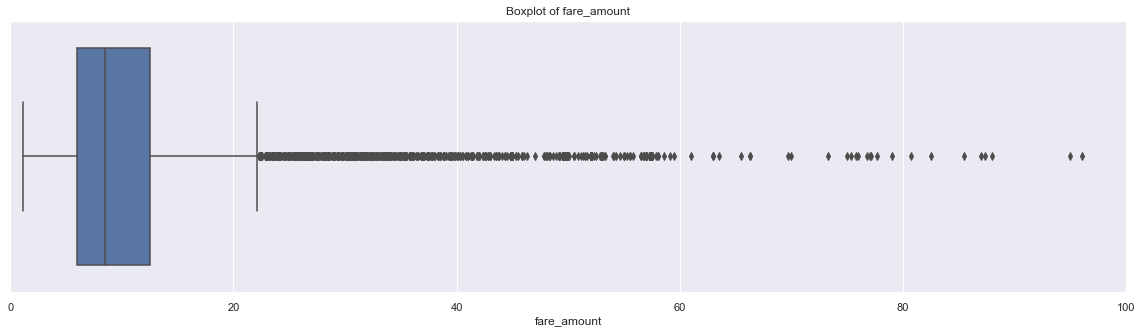

In [59]:
#Boxplot of fare_amount
   
plt.figure(figsize=(20,5)) 
plt.xlim(0,100)
sns.boxplot(x=df_train['fare_amount'],data=df_train,orient='h')
plt.title('Boxplot of fare_amount')

plt.show()

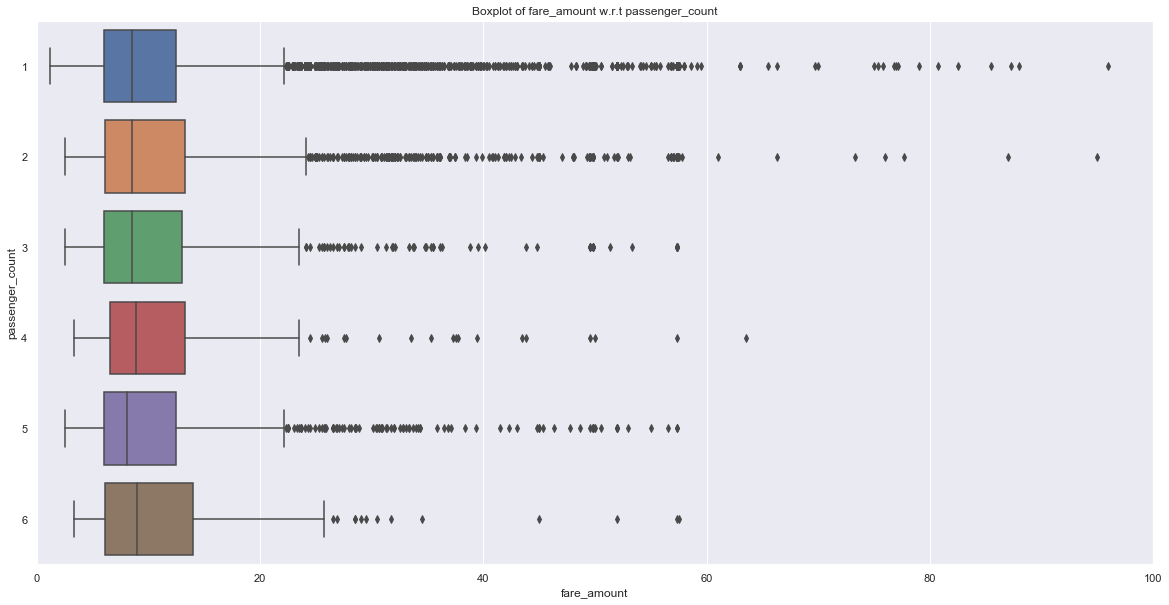

In [60]:
#Boxplot of fare_amount vs passenger_count

plt.figure(figsize=(20,10))
plt.xlim(0,100)
_ = sns.boxplot(x=df_train['fare_amount'],y=df_train['passenger_count'],data=df_train,orient='h')
plt.title('Boxplot of fare_amount w.r.t passenger_count')

plt.show()

- Presence of outliers confirmed.
- We will take the log transform to get rid of the outliers. 

In [61]:
#Log tranformation
df_train['fare_amount_log'] = np.log(df_train['fare_amount'])

In [62]:
df_train['fare_amount_log']

0        1.504077
1        2.827314
2        1.740466
3        2.041220
4        1.667707
           ...   
16062    1.871802
16063    2.778819
16064    2.140066
16065    2.091864
16066    2.140066
Name: fare_amount_log, Length: 15660, dtype: float64

In [63]:
df_train = df_train.drop(['fare_amount'], axis = 1)

The maximum coordinates are situated in North America. So, every coordinate outside of it is an outlier. 
We will remove such observations.

In [64]:
df_train.shape

(15660, 7)

In [65]:
#For latitudes of Pickup Data:
df_train[(df_train['pickup_latitude']<39.6) | (df_train['pickup_latitude']>41.4)]
df_train = df_train.drop(df_train[(df_train['pickup_latitude']<39.6) | (df_train['pickup_latitude']>41.4)].index,axis=0)
df_train.shape

(15651, 7)

In [66]:
#For longitudes of Pickup Data:
df_train[(df_train['pickup_longitude']>-73.1) | (df_train['pickup_longitude']<-74.4)]
df_train = df_train.drop(df_train[(df_train['pickup_longitude']>-73.1) | (df_train['pickup_longitude']<-74.4)].index,axis=0)
df_train.shape

(15649, 7)

In [67]:
#For latitudes of Dropoff Data:
df_train[(df_train['dropoff_latitude']<39.6) | (df_train['dropoff_latitude']>41.4)]
df_train = df_train.drop(df_train[(df_train['dropoff_latitude']<39.6) | (df_train['dropoff_latitude']>41.4)].index,axis=0)
df_train.shape

(15648, 7)

In [68]:
#For longitudes of Dropoff Data:
df_train[(df_train['dropoff_longitude']>-73.1) | (df_train['dropoff_longitude']<-74.4)]
df_train = df_train.drop(df_train[(df_train['dropoff_longitude']>-73.1) | (df_train['dropoff_longitude']<-74.4)].index,axis=0)
df_train.shape

(15647, 7)

We have dealt with the outliers.

## Feature Engineering

Now we will use the existing features to derive some new features which will help us in our analysis.

We will use the pickup_datetime feature to extract new features pickup_date, pickup_year, pickup_month, pickup_weekday and pickup_hour.

In [69]:
df_train['pickup_date'] = df_train["pickup_datetime"].apply(lambda row: row.date)
df_train['pickup_year'] = df_train["pickup_datetime"].apply(lambda row: row.year)
df_train['pickup_month'] = df_train["pickup_datetime"].apply(lambda row: row.month)
df_train['pickup_weekday'] = df_train["pickup_datetime"].apply(lambda row: row.dayofweek)
df_train['pickup_hour'] = df_train["pickup_datetime"].apply(lambda row: row.hour)

In [70]:
df_train.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount_log,pickup_date,pickup_year,pickup_month,pickup_weekday,pickup_hour
0,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.504077,2009-06-15,2009,6,0,17
1,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2.827314,2010-01-05,2010,1,1,16
2,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.740466,2011-08-18,2011,8,3,0
3,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.041220,2012-04-21,2012,4,5,4
4,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.667707,2010-03-09,2010,3,1,7


We will repeat the same for the testing data.

In [71]:
df_test['pickup_date'] = df_test["pickup_datetime"].apply(lambda row: row.date)
df_test['pickup_year'] = df_test["pickup_datetime"].apply(lambda row: row.year)
df_test['pickup_month'] = df_test["pickup_datetime"].apply(lambda row: row.month)
df_test['pickup_weekday'] = df_test["pickup_datetime"].apply(lambda row: row.dayofweek)
df_test['pickup_hour'] = df_test["pickup_datetime"].apply(lambda row: row.hour)

Let's remove the unwanted features.

In [72]:
df_train = df_train.drop(['pickup_datetime','pickup_date'],axis=1)
df_test = df_test.drop(['pickup_datetime','pickup_date'],axis=1)

In [73]:
df_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount_log,pickup_year,pickup_month,pickup_weekday,pickup_hour
0,-73.844311,40.721319,-73.841610,40.712278,1,1.504077,2009,6,0,17
1,-74.016048,40.711303,-73.979268,40.782004,1,2.827314,2010,1,1,16
2,-73.982738,40.761270,-73.991242,40.750562,2,1.740466,2011,8,3,0
3,-73.987130,40.733143,-73.991567,40.758092,1,2.041220,2012,4,5,4
4,-73.968095,40.768008,-73.956655,40.783762,1,1.667707,2010,3,1,7


In [74]:
df_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,1,13
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,1,13
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,5,11
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,5,21
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,5,21


Let's define a function to calculate the trip distance using the pickup and dropoff coordinates.

In [75]:
def haversine(long1,lat1,long2,lat2):
    data = [df_train,df_test]
    for i in data:
        R = 6371000 #Radius of Earth in meters
        phi_1 = np.radians(i[lat1])
        phi_2 = np.radians(i[lat2])
        delta_phi = np.radians(i[lat2] - i[lat1])
        delta_lambda = np.radians(i[long2] - i[long1])
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi_1) * np.cos(phi_2) * np.sin(delta_lambda / 2.0) ** 2
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
        meters = R * c  # output distance in meters
        km = meters / 1000.0  # output distance in kilometers
    
    return km
    

Let's use this function to derive a new feature Distance in both training and testing datasets.

In [76]:
df_train['Distance'] = haversine('pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude')
df_test['Distance'] = haversine('pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude')

In [77]:
df_train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount_log,pickup_year,pickup_month,pickup_weekday,pickup_hour,Distance
0,-73.844311,40.721319,-73.841610,40.712278,1,1.504077,2009,6,0,17,2.323259
1,-74.016048,40.711303,-73.979268,40.782004,1,2.827314,2010,1,1,16,2.425353
2,-73.982738,40.761270,-73.991242,40.750562,2,1.740466,2011,8,3,0,0.618628
3,-73.987130,40.733143,-73.991567,40.758092,1,2.041220,2012,4,5,4,1.961033
4,-73.968095,40.768008,-73.956655,40.783762,1,1.667707,2010,3,1,7,5.387301
...,...,...,...,...,...,...,...,...,...,...,...
16062,-74.008820,40.718757,-73.998865,40.719987,1,1.871802,2014,12,4,7,NaN
16063,-73.981310,40.781695,-74.014392,40.715527,2,2.778819,2009,7,0,7,NaN
16064,-73.972507,40.753417,-73.979577,40.765495,1,2.140066,2009,11,2,11,NaN
16065,-73.957027,40.765945,-73.981983,40.779560,1,2.091864,2010,5,1,23,NaN


In [78]:
df_test

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,Distance
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,1,13,2.323259
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,1,13,2.425353
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,5,11,0.618628
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,5,21,1.961033
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,5,21,5.387301
...,...,...,...,...,...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6,2015,5,6,12,2.124874
9910,-73.945511,40.803600,-73.960213,40.776371,6,2015,1,0,17,3.270969
9911,-73.991600,40.726608,-73.789742,40.647011,6,2015,4,6,20,19.183942
9912,-73.985573,40.735432,-73.939178,40.801731,6,2015,1,5,1,8.343486


In [79]:
pd.DataFrame(df_train.isnull().sum())

,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
fare_amount_log,0
pickup_year,0
pickup_month,0
pickup_weekday,0
pickup_hour,0


In [80]:
df_train.shape

(15647, 11)

In [81]:
df_train['Distance'].describe()

count    9645.000000
mean        3.427972
std         3.976934
min         0.000000
25%         1.296462
50%         2.214583
75%         4.040994
max        99.996040
Name: Distance, dtype: float64

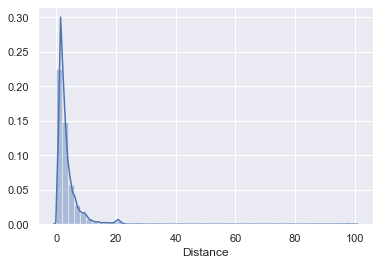

In [82]:
sns.distplot(df_train['Distance'])

In [83]:
df_train['Distance'].median()

2.2145826358692347

In [84]:
df_train['Distance'].fillna(df_train['Distance'].median(), inplace =True)

In [85]:
pd.DataFrame(df_test.isnull().sum())

,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
pickup_year,0
pickup_month,0
pickup_weekday,0
pickup_hour,0
Distance,0


Let's discard the features we won't be needing anymore.

In [86]:
df_train = df_train.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1)
df_test = df_test.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1)

In [87]:
df_train.head()

,passenger_count,fare_amount_log,pickup_year,pickup_month,pickup_weekday,pickup_hour,Distance
0,1,1.504077,2009,6,0,17,2.323259
1,1,2.827314,2010,1,1,16,2.425353
2,2,1.740466,2011,8,3,0,0.618628
3,1,2.041220,2012,4,5,4,1.961033
4,1,1.667707,2010,3,1,7,5.387301


In [88]:
df_test.head()

,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,Distance
0,1,2015,1,1,13,2.323259
1,1,2015,1,1,13,2.425353
2,1,2011,10,5,11,0.618628
3,1,2012,12,5,21,1.961033
4,1,2012,12,5,21,5.387301


In [89]:
df_train = df_train[['pickup_year','pickup_month','pickup_weekday','pickup_hour','Distance','passenger_count','fare_amount_log']]
df_train.head()

,pickup_year,pickup_month,pickup_weekday,pickup_hour,Distance,passenger_count,fare_amount_log
0,2009,6,0,17,2.323259,1,1.504077
1,2010,1,1,16,2.425353,1,2.827314
2,2011,8,3,0,0.618628,2,1.740466
3,2012,4,5,4,1.961033,1,2.041220
4,2010,3,1,7,5.387301,1,1.667707


In [90]:
df_test = df_test[['pickup_year','pickup_month','pickup_weekday','pickup_hour','Distance','passenger_count']]
df_test.head()

,pickup_year,pickup_month,pickup_weekday,pickup_hour,Distance,passenger_count
0,2015,1,1,13,2.323259,1
1,2015,1,1,13,2.425353,1
2,2011,10,5,11,0.618628,1
3,2012,12,5,21,1.961033,1
4,2012,12,5,21,5.387301,1


## Correlation Analysis

Let's check for correlation among the features.

In [91]:
num_cols = ['Distance','fare_amount_log']

df_corr = df_train.loc[:,df_train.columns]

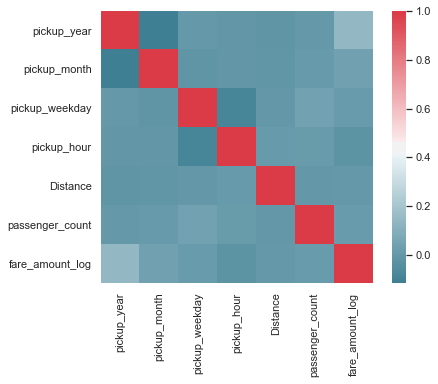

In [92]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [93]:
corr

,pickup_year,pickup_month,pickup_weekday,pickup_hour,Distance,passenger_count,fare_amount_log
pickup_year,1.000000,-0.115406,0.005584,-0.004393,-0.011479,0.002539,0.145774
pickup_month,-0.115406,1.000000,-0.014095,-0.003607,-0.009089,0.010671,0.037793
pickup_weekday,0.005584,-0.014095,1.000000,-0.086977,0.002118,0.042514,0.013024
pickup_hour,-0.004393,-0.003607,-0.086977,1.000000,0.007643,0.018109,-0.023714
Distance,-0.011479,-0.009089,0.002118,0.007643,1.000000,-0.001430,0.004637
passenger_count,0.002539,0.010671,0.042514,0.018109,-0.001430,1.000000,0.013528
fare_amount_log,0.145774,0.037793,0.013024,-0.023714,0.004637,0.013528,1.000000


- No significance correlation among the features, so no need to discard any of them.

## Feature Scaling

Let's scale the features in the dataset in the scale of 0 to 1. 

In [94]:
scaler = MinMaxScaler()

In [95]:
df_train = df_train.reset_index()
df_train

,index,pickup_year,pickup_month,pickup_weekday,pickup_hour,Distance,passenger_count,fare_amount_log
0,0,2009,6,0,17,2.323259,1,1.504077
1,1,2010,1,1,16,2.425353,1,2.827314
2,2,2011,8,3,0,0.618628,2,1.740466
3,3,2012,4,5,4,1.961033,1,2.041220
4,4,2010,3,1,7,5.387301,1,1.667707
...,...,...,...,...,...,...,...,...
15642,16062,2014,12,4,7,2.214583,1,1.871802
15643,16063,2009,7,0,7,2.214583,2,2.778819
15644,16064,2009,11,2,11,2.214583,1,2.140066
15645,16065,2010,5,1,23,2.214583,1,2.091864


In [96]:
df_train = df_train.drop(['index'], axis = 1)

In [97]:
df_train

,pickup_year,pickup_month,pickup_weekday,pickup_hour,Distance,passenger_count,fare_amount_log
0,2009,6,0,17,2.323259,1,1.504077
1,2010,1,1,16,2.425353,1,2.827314
2,2011,8,3,0,0.618628,2,1.740466
3,2012,4,5,4,1.961033,1,2.041220
4,2010,3,1,7,5.387301,1,1.667707
...,...,...,...,...,...,...,...
15642,2014,12,4,7,2.214583,1,1.871802
15643,2009,7,0,7,2.214583,2,2.778819
15644,2009,11,2,11,2.214583,1,2.140066
15645,2010,5,1,23,2.214583,1,2.091864


In [98]:
df_scaled = pd.DataFrame(scaler.fit_transform(df_train))

In [99]:
df_scaled.columns = df_train.columns

In [100]:
df_scaled

,pickup_year,pickup_month,pickup_weekday,pickup_hour,Distance,passenger_count,fare_amount_log
0,0.000000,0.454545,0.000000,0.739130,0.023234,0.0,0.127464
1,0.166667,0.000000,0.166667,0.695652,0.024254,0.0,0.250304
2,0.333333,0.636364,0.500000,0.000000,0.006187,0.2,0.149409
3,0.500000,0.272727,0.833333,0.173913,0.019611,0.0,0.177329
4,0.166667,0.181818,0.166667,0.304348,0.053875,0.0,0.142654
...,...,...,...,...,...,...,...
15642,0.833333,1.000000,0.666667,0.304348,0.022147,0.0,0.161601
15643,0.000000,0.545455,0.000000,0.304348,0.022147,0.2,0.245802
15644,0.000000,0.909091,0.333333,0.478261,0.022147,0.0,0.186505
15645,0.166667,0.363636,0.166667,1.000000,0.022147,0.0,0.182030


In [101]:
df_preprocessed = df_scaled.copy()

## Model Development

We will be using RMSE to evaluate our different models.

### Splitting the train data into training and test data sets for comparing 

In [102]:
X = df_preprocessed.drop('fare_amount_log',axis=1).values
y = df_preprocessed['fare_amount_log'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(df_train.shape, X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(15647, 7) (12517, 6) (3130, 6) (12517,) (3130,)


### Linear Regression

In [103]:
#Training the model on the training data
LR_model = sm.OLS(y_train,X_train).fit()

In [104]:
LR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.870
Method:                 Least Squares   F-statistic:                          1.397e+04
Date:                Fri, 25 Sep 2020   Prob (F-statistic):                        0.00
Time:                        20:55:32   Log-Likelihood:                          15073.
No. Observations:               12517   AIC:                                 -3.013e+04
Df Residuals:                   12511   BIC:                                 -3.009e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0929      0.002     49.336      0.000       0.089       0.097
x2             0.0786      0.002     42.562      0.000       0.075       0.082
x3             0.0669      0.002     37.772      0.000       0.063       0.070
x4             0.0921      0.002     49.416      0.000       0.088       0.096
x5             0.3462      0.019     17.760      0.000       0.308       0.384
x6             0.0231      0.003      9.034      0.000       0.018       0.028
==============================================================================
Omnibus:                      874.168   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1759.281
Skew:                           0.482   Prob(JB):                         0.00
Kurtosis:                       4.563   Cond. No.                         32.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
#Predicting the test dependent feature values:
predictions_LR = LR_model.predict(X_test)

In [106]:
#Calculating the RMSE:
RMSE_LR = np.sqrt(mean_squared_error(y_test,predictions_LR))

In [107]:
RMSE_LR

0.07174605346037602

### Decision Trees

In [108]:
#Training the model on training data
DT_model = DecisionTreeRegressor(max_depth=2).fit(X_train,y_train)

In [109]:
#Predicting the test dependent feature values:
predictions_DT = DT_model.predict(X_test)

In [110]:
#Calculating the RMSE:
RMSE_DT = np.sqrt(mean_squared_error(y_test,predictions_DT))

In [111]:
RMSE_DT

0.05493459428594209

### Random Forest

In [112]:
#Training the model on training data
RF_model = RandomForestRegressor(n_estimators=500).fit(X_train,y_train)

In [113]:
#Predicting the test dependent feature values:
predictions_RF = RF_model.predict(X_test)

In [114]:
#Calculating the RMSE:
RMSE_RF = np.sqrt(mean_squared_error(y_test,predictions_RF))

In [115]:
RMSE_RF

0.05840159214818557

## Model Selection

Since, Decision Tree algorithm has lesser RMSE than Linear Regression and Random Forest, Decision Tree is our final model.

Let's finalize the model and predict on the test dataset.

We will be training our selected model on the entire training dataset.

In [116]:
test_pickup_datetime = data_test['pickup_datetime']

In [117]:
#Independent features values of the training dataset will be stored in X
X = df_preprocessed.drop('fare_amount_log',axis=1).values

In [118]:
#Dependent feature values of the training dataset will be stored in y 
y = df_preprocessed['fare_amount_log'].values

In [119]:
DT_final_model = DecisionTreeRegressor(max_depth=2).fit(X,y)

Now, we will predict the testing data set.

Before passing the independent features, we will scale them as the model has been trained on a scaled data.

In [120]:
df_test.head()

,pickup_year,pickup_month,pickup_weekday,pickup_hour,Distance,passenger_count
0,2015,1,1,13,2.323259,1
1,2015,1,1,13,2.425353,1
2,2011,10,5,11,0.618628,1
3,2012,12,5,21,1.961033,1
4,2012,12,5,21,5.387301,1


In [121]:
df_test_scaled = pd.DataFrame(scaler.fit_transform(df_test))

In [122]:
df_test_scaled.columns = df_test.columns

In [123]:
df_test_scaled.head()

,pickup_year,pickup_month,pickup_weekday,pickup_hour,Distance,passenger_count
0,1.000000,0.000000,0.166667,0.565217,0.023234,0.0
1,1.000000,0.000000,0.166667,0.565217,0.024254,0.0
2,0.333333,0.818182,0.833333,0.478261,0.006187,0.0
3,0.500000,1.000000,0.833333,0.913043,0.019611,0.0
4,0.500000,1.000000,0.833333,0.913043,0.053875,0.0


In [124]:
Final_predictions = DT_final_model.predict(df_test_scaled)

The dependent feature was log transformed to get rid of outliers, so we will apply the exponential transformation to it to get the predicted values in the original form.

In [125]:
Final_predictions = np.exp(Final_predictions)

In [126]:
Predictions_with_date = pd.DataFrame({"pickup_datetime":test_pickup_datetime,"fare_amount" : Final_predictions})

In [127]:
Predictions_with_date.head()

,pickup_datetime,fare_amount
0,2015-01-27 13:08:24+00:00,1.225499
1,2015-01-27 13:08:24+00:00,1.225499
2,2011-10-08 11:53:44+00:00,1.201876
3,2012-12-01 21:12:12+00:00,1.214579
4,2012-12-01 21:12:12+00:00,1.214579
